<a href="https://colab.research.google.com/github/zelestik/Big-open-data-labs/blob/main/%D0%9B%D0%A08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0              8.8             0.420         0.21  ...       0.52     9.20        5
1              9.0             0.580         0.25  ...       0.57     9.70        5
2              9.3             0.655         0.26  ...       0.42     9.60        5
3              9.3             0.655         0.26  ...       0.42     9.60        5
4              8.8             0.590         0.18  ...       0.54     9.40        5
..             ...               ...          ...  ...        ...      ...      ...
741            6.6             0.560         0.14  ...       0.62    11.70        7
742            7.4             0.250         0.29  ...       0.76    10.90        7
743            8.4             0.370         0.43  ...       0.81    11.20        7
744            7.0             0.560         0.17  ...       0.68    10.55        7
745            6.7             0.320         0.44  ...       0.80    11.60  

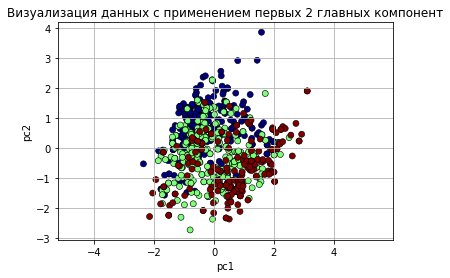

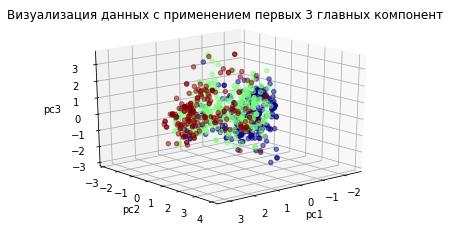

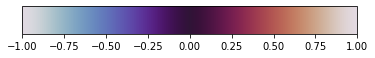

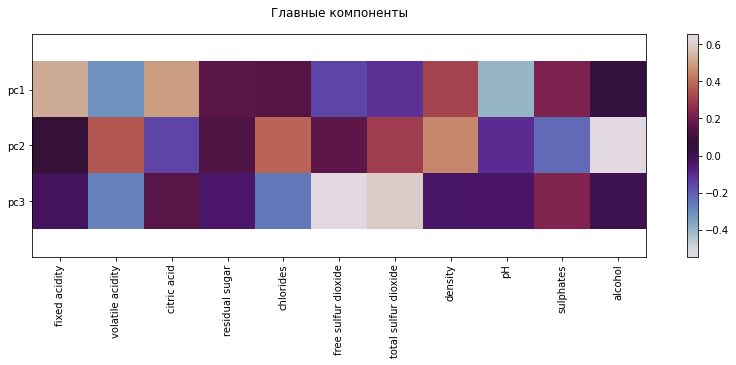

3|0.3340832401533251
8|0.5333858110753624
10|0.5763563563189753
0|0.6214797142956534
9|0.6726914642176196
4|0.7797164931507932
2|0.7961289353112107
7|0.8037156525674568
1|0.9332401110148127
5|0.9668472764450078
6|1.000847776374814


In [ ]:

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import math
ss = StandardScaler()
df = pd.read_csv('2.0DataSet.csv', delimiter=";")
print(df)
# Стандартизируем данные
df.iloc[:, :-1] = ss.fit_transform(df.iloc[:, :-1])
df_2 = df.copy()
df_3 = df.copy()

# Применяем метод главных компонент (первых 2)
pca2 = PCA(n_components=2, whiten=True, random_state=0).fit(df) 
df_2 = pd.DataFrame(data = pca2.fit_transform(df_2.iloc[:, :-1]), columns=['pc1', 'pc2'])
# (первых 3)
pca3 = PCA(n_components=3, whiten=True, random_state=0).fit(df)
df_3 = pd.DataFrame(data = pca3.fit_transform(df_3.iloc[:, :-1]), columns=['pc1', 'pc2', 'pc3'])

# Визуализация данных с применением первых 2 компонент
# Задание 1
print(df_2)
plt.figure()
plt.grid()

plt.scatter(df_2['pc1'], df_2['pc2'], c=df['quality'], edgecolor='black', lw=.6, cmap='jet')

plt.axis('equal')
plt.title('Визуализация данных с применением первых 2 главных компонент')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

# Визуализация данных с применением первых 3 компонент
# Задание 1
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d', xlabel="pc1", ylabel="pc2", zlabel="pc3")
ax.scatter(df_3['pc1'], df_3['pc2'], df_3['pc3'], c=df['quality'], alpha=0.5, cmap='jet')

# Поворачиваем график
ax.view_init(20, 50)
plt.title('Визуализация данных с применением первых 3 главных компонент')
plt.draw()

# Тепловая карта
# Задание 2
# Выводим условные обозначения
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=-1, vmax=1)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='twilight'), 
             cax=ax, orientation='horizontal')	

# Создаем тепловую карту
plt.matshow(pca3.components_, cmap='twilight')
cb = plt.colorbar()
plt.gca().xaxis.tick_bottom()
# Строки (названия)
plt.xticks(range(len(df.columns) - 1), df.iloc[:, :-1].columns, rotation=90)
# Столбцы (названия)
plt.yticks(range(len(df_3.columns)), df_3.columns)
plt.title("Главные компоненты")
i, k = plt.ylim() #
plt.ylim(i+0.5, k-0.5) #

plt.show()

# Поиск суммарного "вклада" признака в главные компоненты
# Для задания 3
comp_weight = []
for i in range (len(pca3.components_[0])):
  comp_weight.append(math.fabs(pca3.components_[0][i])+math.fabs(pca3.components_[1][i])+math.fabs(pca3.components_[2][i]))
# Вывод признаков и их суммарного "вклада" в порядке возрастания "вклада"
# Для задания 3
for i in range (len(comp_weight)):
  min_val = min(comp_weight)
  min_index = comp_weight.index(min_val)
  # Заменяем минимальное число на очень большое
  comp_weight[min_index] = 1000
  # Выводим номер признака и значение
  print(str(min_index) + "|" + str(min_val))

